In [195]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

##Determine Inputs & Ouputs(Output Size is 5*3)

In [196]:
a = [[-1,-1,-1,-1,-1,-1,+1],
     [-1,-1,-1,-1,-1,-1,+1],
     [ 1, 1, 1,1, 1, 1, 1],
     [+1,-1,-1,1,-1,-1,-1],
     [+1,-1,-1,1,-1,-1,-1],
     [-1,-1,-1,1,-1,-1,-1],
     [-1,-1,-1,1,-1,-1,-1],
     [-1,-1,-1,1,-1,-1,-1],
     [-1,-1,-1,1,-1,-1,-1]]

b =   [[1,-1,-1,-1,-1,-1,1],
       [1,-1,-1,-1,-1,-1,1],
       [1,-1,-1,-1,-1,-1,1],
       [1,-1,-1,-1,-1,-1,1],
       [1,-1,-1,-1,-1,-1,1],
       [1,-1,-1,-1,-1,-1,1],
       [ 1, 1, 1,1, 1, 1, 1],
       [-1,-1,-1,-1,-1,-1,-1],
       [-1,-1,-1,1,-1,-1,-1]]

c =  [[1,-1,-1,-1,-1,-1,1],
      [1,-1,-1,-1,-1,-1,1],
      [1,-1,-1,-1,-1,-1,1],
      [1,-1,-1,-1,-1,-1,1],
      [1,-1,-1,+1,-1,-1,1],
      [1,-1,-1,-1,-1,-1,1],
      [1,-1,-1,-1,-1,-1,1],
      [1,-1,-1,-1,-1,-1,1],
      [ 1, 1, 1,1, 1, 1,1]]

A2 = [[-1,-1,1],
      [1 ,1, 1],
      [1 ,1,-1],
      [-1,1,-1],
      [-1,1,-1]]

B2 = [[1 ,-1, 1],
      [1 ,-1, 1],
      [1 , 1, 1],
      [-1,-1,-1],
      [-1, 1,-1]]

C2 = [[1 , -1, 1],
      [1 , -1, 1],
      [1 ,  1, 1],
      [1 , -1, 1],
      [1 ,  1, 1]]

A = np.array(a)
B = np.array(b)
C = np.array(c)

A2 = np.array(A2)
B2 = np.array(B2)
C2 = np.array(C2)

>Plot Inputs

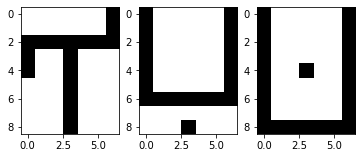

In [197]:
plt.subplot(1, 3, 1)
plt.imshow(A, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(B, cmap='binary')

plt.subplot(1, 3, 3)
plt.imshow(C, cmap='binary')

plt.show()

> Reshape Matrixes to Vectors

In [198]:
X1 = A.reshape(63,1)
X2 = B.reshape(63,1)
X3 = C.reshape(63,1)

S1=A2.reshape(15,1)
S2=B2.reshape(15,1)
S3=C2.reshape(15,1)

>Compute Weights

In [199]:
W1 = np.zeros((63,1))
W2 = np.zeros((63,1))
W3 = np.zeros((63,1))
W1 = np.dot(X1,S1.T)
W2 = np.dot(X2,S2.T)
W3 = np.dot(X3,S3.T)
W = W1 + W2 + W3

In [200]:
S1_n = np.dot(W.T,X1)
S2_n = np.dot(W.T,X2)
S3_n = np.dot(W.T,X3)

In [201]:
def activation_function(X):
    if X > 0:
        X = 1
    elif X < 0:
        X = -1
    return X

##20%

> Generate 20% miss on the inputs

In [202]:
A_n = A.copy()
B_n = B.copy()
C_n = C.copy()
A_miss = np.reshape(A_n,(63,1))
B_miss = np.reshape(B_n,(63,1))
C_miss = np.reshape(C_n,(63,1))
A_miss[np.random.randint(63,size=(13,1))]=0
B_miss[np.random.randint(63,size=(13,1))]=0
C_miss[np.random.randint(63,size=(13,1))]=0
A_miss = np.reshape(A_miss,(9,7))
B_miss = np.reshape(B_miss,(9,7))
C_miss = np.reshape(C_miss,(9,7))

>Plot 20% missy inputs

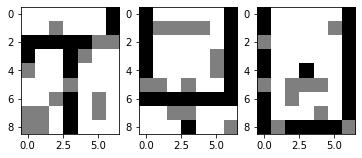

In [203]:
plt.subplot(1, 3, 1)
plt.imshow(A_miss, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(B_miss, cmap='binary')
plt.subplot(1, 3, 3)
plt.imshow(C_miss, cmap='binary')
plt.show()

>Reshape missy inputs to vectors

In [204]:
X1_miss = A_miss.reshape(63,1)
X2_miss = B_miss.reshape(63,1)
X3_miss = C_miss.reshape(63,1)

S1=A2.reshape(15,1)
S2=B2.reshape(15,1)
S3=C2.reshape(15,1)

>Compute Outputs

In [205]:
S1_miss = np.dot(W.T,X1_miss)
S2_miss = np.dot(W.T,X2_miss)
S3_miss = np.dot(W.T,X3_miss)

In [206]:
S1_new = np.zeros((15,1))
for i in range(15):
  S1_new[i] = activation_function(S1_miss[i])
  
S2_new = np.zeros((15,1))
for i in range(15):
  S2_new[i] = activation_function(S2_miss[i])
  
S3_new = np.zeros((15,1))
for i in range(15):
  S3_new[i] = activation_function(S3_miss[i])

>Reshape Output vetors to matrixes

In [207]:
S1_new = np.reshape(S1_new, (5,3))
S2_new = np.reshape(S2_new, (5,3))
S3_new = np.reshape(S3_new, (5,3))

>Plot Outputs

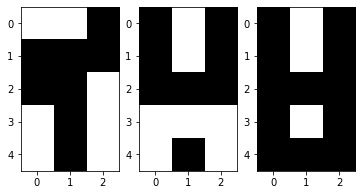

In [208]:
plt.subplot(1, 3, 1)
plt.imshow(S1_new, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(S2_new, cmap='binary')
plt.subplot(1, 3, 3)
plt.imshow(S3_new, cmap='binary')
plt.show()

>Computing accuracy for 20% noise in 100 loop(number of outputs = 300)

In [209]:
err = 0
for i in range(100):
  A_n = A.copy()
  B_n = B.copy()
  C_n = C.copy()
  A_miss = np.reshape(A_n,(63,1))
  B_miss = np.reshape(B_n,(63,1))
  C_miss = np.reshape(C_n,(63,1))
  A_miss[np.random.randint(63,size=(13,1))]=0
  B_miss[np.random.randint(63,size=(13,1))]=0
  C_miss[np.random.randint(63,size=(13,1))]=0
  A_miss = np.reshape(A_miss,(9,7))
  B_miss = np.reshape(B_miss,(9,7))
  C_miss = np.reshape(C_miss,(9,7))

  X1_miss = A_miss.reshape(63,1)
  X2_miss = B_miss.reshape(63,1)
  X3_miss = C_miss.reshape(63,1)

  S1=A2.reshape(15,1)
  S2=B2.reshape(15,1)
  S3=C2.reshape(15,1)
  S1_miss = np.dot(W.T,X1_miss)
  S2_miss = np.dot(W.T,X2_miss)
  S3_miss = np.dot(W.T,X3_miss)
  S1_new = np.zeros((15,1))
  for i in range(15):
    S1_new[i] = activation_function(S1_miss[i])
  
  S2_new = np.zeros((15,1))
  for i in range(15):
    S2_new[i] = activation_function(S2_miss[i])
    
  S3_new = np.zeros((15,1))
  for i in range(15):
    S3_new[i] = activation_function(S3_miss[i])
  
  S1_new = np.reshape(S1_new, (5,3))
  ss1 = False in (S1_new == A2)
  if ss1 == True:
    err = err + 1
  S2_new = np.reshape(S2_new, (5,3))
  ss2 = False in (S2_new == B2)
  if ss2 == True:
    err = err + 1
  S3_new = np.reshape(S3_new, (5,3))
  ss3 = False in (S3_new == C2)
  if ss3 == True:
    err = err + 1
print('The number of false output is',err)
print('The accuracy is',((300-err)/300)*100)


The number of false output is 0
The accuracy is 100.0


#60%

> Generate 60% miss on the inputs

In [210]:
A_n = A.copy()
B_n = B.copy()
C_n = C.copy()
A_miss = np.reshape(A_n,(63,1))
B_miss = np.reshape(B_n,(63,1))
C_miss = np.reshape(C_n,(63,1))
A_miss[np.random.randint(63,size=(38,1))]=0
B_miss[np.random.randint(63,size=(38,1))]=0
C_miss[np.random.randint(63,size=(38,1))]=0
A_miss = np.reshape(A_miss,(9,7))
B_miss = np.reshape(B_miss,(9,7))
C_miss = np.reshape(C_miss,(9,7))

>Plot 60% missy inputs

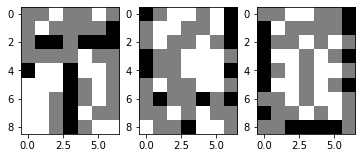

In [211]:
plt.subplot(1, 3, 1)
plt.imshow(A_miss, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(B_miss, cmap='binary')
plt.subplot(1, 3, 3)
plt.imshow(C_miss, cmap='binary')
plt.show()

>Reshape missy inputs to vectors

In [212]:
X1_miss = A_miss.reshape(63,1)
X2_miss = B_miss.reshape(63,1)
X3_miss = C_miss.reshape(63,1)

S1=A2.reshape(15,1)
S2=B2.reshape(15,1)
S3=C2.reshape(15,1)

>Compute Outputs

In [213]:
S1_miss = np.dot(W.T,X1_miss)
S2_miss = np.dot(W.T,X2_miss)
S3_miss = np.dot(W.T,X3_miss)

In [214]:
S1_new = np.zeros((15,1))
for i in range(15):
  S1_new[i] = activation_function(S1_miss[i])
  
S2_new = np.zeros((15,1))
for i in range(15):
  S2_new[i] = activation_function(S2_miss[i])
  
S3_new = np.zeros((15,1))
for i in range(15):
  S3_new[i] = activation_function(S3_miss[i])

>Reshape Output vetors to matrixes

In [215]:
S1_new = np.reshape(S1_new, (5,3))
S2_new = np.reshape(S2_new, (5,3))
S3_new = np.reshape(S3_new, (5,3))

>Plot Outputs

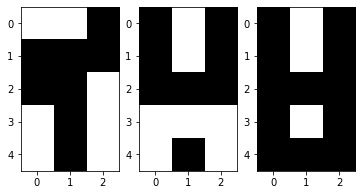

In [216]:
plt.subplot(1, 3, 1)
plt.imshow(S1_new, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(S2_new, cmap='binary')
plt.subplot(1, 3, 3)
plt.imshow(S3_new, cmap='binary')
plt.show()

>Computing accuracy for 60% noise in 100 loop(number of outputs = 300)

In [217]:
err = 0
for i in range(100):
  A_n = A.copy()
  B_n = B.copy()
  C_n = C.copy()
  A_miss = np.reshape(A_n,(63,1))
  B_miss = np.reshape(B_n,(63,1))
  C_miss = np.reshape(C_n,(63,1))
  A_miss[np.random.randint(63,size=(38,1))]=0
  B_miss[np.random.randint(63,size=(38,1))]=0
  C_miss[np.random.randint(63,size=(38,1))]=0
  A_miss = np.reshape(A_miss,(9,7))
  B_miss = np.reshape(B_miss,(9,7))
  C_miss = np.reshape(C_miss,(9,7))

  X1_miss = A_miss.reshape(63,1)
  X2_miss = B_miss.reshape(63,1)
  X3_miss = C_miss.reshape(63,1)

  S1=A2.reshape(15,1)
  S2=B2.reshape(15,1)
  S3=C2.reshape(15,1)
  S1_miss = np.dot(W.T,X1_miss)
  S2_miss = np.dot(W.T,X2_miss)
  S3_miss = np.dot(W.T,X3_miss)
  S1_new = np.zeros((15,1))
  for i in range(15):
    S1_new[i] = activation_function(S1_miss[i])
  
  S2_new = np.zeros((15,1))
  for i in range(15):
    S2_new[i] = activation_function(S2_miss[i])
    
  S3_new = np.zeros((15,1))
  for i in range(15):
    S3_new[i] = activation_function(S3_miss[i])
  
  S1_new = np.reshape(S1_new, (5,3))
  ss1 = False in (S1_new == A2)
  if ss1 == True:
    err = err + 1
  S2_new = np.reshape(S2_new, (5,3))
  ss2 = False in (S2_new == B2)
  if ss2 == True:
    err = err + 1
  S3_new = np.reshape(S3_new, (5,3))
  ss3 = False in (S3_new == C2)
  if ss3 == True:
    err = err + 1
print('The number of false output is',err)
print('The accuracy is',((300-err)/300)*100)


The number of false output is 10
The accuracy is 96.66666666666667


##Determine Inputs & Ouputs(Output Size is 4*3)

In [218]:
A2 = [[-1,-1,1],
      [1 ,1, 1],
      [1 ,1,-1],
      [-1,1,-1]]

B2 = [[1 ,-1, 1],
      [1 , 1, 1],
      [-1,-1,-1],
      [-1, 1,-1]]

C2 = [[1 , -1, 1],
      [1 ,  1, 1],
      [1 , -1, 1],
      [1 ,  1, 1]]

A2 = np.array(A2)
B2 = np.array(B2)
C2 = np.array(C2)

S1=A2.reshape(12,1)
S2=B2.reshape(12,1)
S3=C2.reshape(12,1)

>Compute Weights

In [219]:
W1 = np.zeros((63,1))
W2 = np.zeros((63,1))
W3 = np.zeros((63,1))
W1 = np.dot(X1,S1.T)
W2 = np.dot(X2,S2.T)
W3 = np.dot(X3,S3.T)
W = W1 + W2 + W3

##20%

> Generate 20% miss on the inputs

In [220]:
A_n = A.copy()
B_n = B.copy()
C_n = C.copy()
A_miss = np.reshape(A_n,(63,1))
B_miss = np.reshape(B_n,(63,1))
C_miss = np.reshape(C_n,(63,1))
A_miss[np.random.randint(63,size=(13,1))]=0
B_miss[np.random.randint(63,size=(13,1))]=0
C_miss[np.random.randint(63,size=(13,1))]=0
A_miss = np.reshape(A_miss,(9,7))
B_miss = np.reshape(B_miss,(9,7))
C_miss = np.reshape(C_miss,(9,7))

>Plot 20% missy inputs

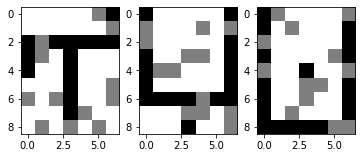

In [221]:
plt.subplot(1, 3, 1)
plt.imshow(A_miss, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(B_miss, cmap='binary')
plt.subplot(1, 3, 3)
plt.imshow(C_miss, cmap='binary')
plt.show()

>Reshape missy inputs to vectors

In [222]:
X1_miss = A_miss.reshape(63,1)
X2_miss = B_miss.reshape(63,1)
X3_miss = C_miss.reshape(63,1)

S1=A2.reshape(12,1)
S2=B2.reshape(12,1)
S3=C2.reshape(12,1)

>Compute Outputs

In [223]:
S1_miss = np.dot(W.T,X1_miss)
S2_miss = np.dot(W.T,X2_miss)
S3_miss = np.dot(W.T,X3_miss)

In [224]:
S1_new = np.zeros((12,1))
for i in range(12):
  S1_new[i] = activation_function(S1_miss[i])
  
S2_new = np.zeros((12,1))
for i in range(12):
  S2_new[i] = activation_function(S2_miss[i])
  
S3_new = np.zeros((12,1))
for i in range(12):
  S3_new[i] = activation_function(S3_miss[i])

>Reshape Output vetors to matrixes

In [225]:
S1_new = np.reshape(S1_new, (4,3))
S2_new = np.reshape(S2_new, (4,3))
S3_new = np.reshape(S3_new, (4,3))

>Plot Outputs

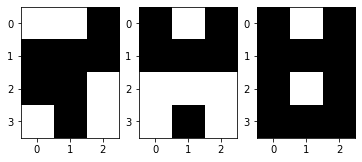

In [226]:
plt.subplot(1, 3, 1)
plt.imshow(S1_new, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(S2_new, cmap='binary')
plt.subplot(1, 3, 3)
plt.imshow(S3_new, cmap='binary')
plt.show()

>Computing accuracy for 20% noise in 100 loop(number of outputs = 300)

In [227]:
err = 0
for i in range(100):
  A_n = A.copy()
  B_n = B.copy()
  C_n = C.copy()
  A_miss = np.reshape(A_n,(63,1))
  B_miss = np.reshape(B_n,(63,1))
  C_miss = np.reshape(C_n,(63,1))
  A_miss[np.random.randint(63,size=(13,1))]=0
  B_miss[np.random.randint(63,size=(13,1))]=0
  C_miss[np.random.randint(63,size=(13,1))]=0
  A_miss = np.reshape(A_miss,(9,7))
  B_miss = np.reshape(B_miss,(9,7))
  C_miss = np.reshape(C_miss,(9,7))

  X1_miss = A_miss.reshape(63,1)
  X2_miss = B_miss.reshape(63,1)
  X3_miss = C_miss.reshape(63,1)

  S1=A2.reshape(12,1)
  S2=B2.reshape(12,1)
  S3=C2.reshape(12,1)
  S1_miss = np.dot(W.T,X1_miss)
  S2_miss = np.dot(W.T,X2_miss)
  S3_miss = np.dot(W.T,X3_miss)
  S1_new = np.zeros((12,1))
  for i in range(12):
    S1_new[i] = activation_function(S1_miss[i])
  
  S2_new = np.zeros((12,1))
  for i in range(12):
    S2_new[i] = activation_function(S2_miss[i])
    
  S3_new = np.zeros((12,1))
  for i in range(12):
    S3_new[i] = activation_function(S3_miss[i])
  
  S1_new = np.reshape(S1_new, (4,3))
  ss1 = False in (S1_new == A2)
  if ss1 == True:
    err = err + 1
  S2_new = np.reshape(S2_new, (4,3))
  ss2 = False in (S2_new == B2)
  if ss2 == True:
    err = err + 1
  S3_new = np.reshape(S3_new, (4,3))
  ss3 = False in (S3_new == C2)
  if ss3 == True:
    err = err + 1
print('The number of false output is',err)
print('The accuracy is',((300-err)/300)*100)


The number of false output is 8
The accuracy is 97.33333333333334


#60%

> Generate 60% miss on the inputs

In [228]:
A_n = A.copy()
B_n = B.copy()
C_n = C.copy()
A_miss = np.reshape(A_n,(63,1))
B_miss = np.reshape(B_n,(63,1))
C_miss = np.reshape(C_n,(63,1))
A_miss[np.random.randint(63,size=(38,1))]=0
B_miss[np.random.randint(63,size=(38,1))]=0
C_miss[np.random.randint(63,size=(38,1))]=0
A_miss = np.reshape(A_miss,(9,7))
B_miss = np.reshape(B_miss,(9,7))
C_miss = np.reshape(C_miss,(9,7))

>Plot 60% missy inputs

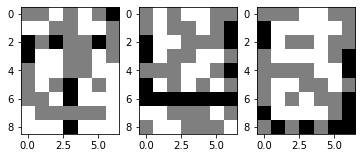

In [229]:
plt.subplot(1, 3, 1)
plt.imshow(A_miss, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(B_miss, cmap='binary')
plt.subplot(1, 3, 3)
plt.imshow(C_miss, cmap='binary')
plt.show()

>Reshape missy inputs to vectors

In [230]:
X1_miss = A_miss.reshape(63,1)
X2_miss = B_miss.reshape(63,1)
X3_miss = C_miss.reshape(63,1)

S1=A2.reshape(12,1)
S2=B2.reshape(12,1)
S3=C2.reshape(12,1)

>Compute Outputs

In [231]:
S1_miss = np.dot(W.T,X1_miss)
S2_miss = np.dot(W.T,X2_miss)
S3_miss = np.dot(W.T,X3_miss)

In [232]:
S1_new = np.zeros((12,1))
for i in range(12):
  S1_new[i] = activation_function(S1_miss[i])
  
S2_new = np.zeros((12,1))
for i in range(12):
  S2_new[i] = activation_function(S2_miss[i])
  
S3_new = np.zeros((12,1))
for i in range(12):
  S3_new[i] = activation_function(S3_miss[i])

>Reshape Output vetors to matrixes

In [233]:
S1_new = np.reshape(S1_new, (4,3))
S2_new = np.reshape(S2_new, (4,3))
S3_new = np.reshape(S3_new, (4,3))

>Plot Outputs

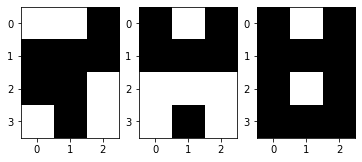

In [234]:
plt.subplot(1, 3, 1)
plt.imshow(S1_new, cmap='binary')
plt.subplot(1, 3, 2)
plt.imshow(S2_new, cmap='binary')
plt.subplot(1, 3, 3)
plt.imshow(S3_new, cmap='binary')
plt.show()

>Computing accuracy for 60% noise in 100 loop(number of outputs = 300)

In [235]:
err = 0
for i in range(100):
  A_n = A.copy()
  B_n = B.copy()
  C_n = C.copy()
  A_miss = np.reshape(A_n,(63,1))
  B_miss = np.reshape(B_n,(63,1))
  C_miss = np.reshape(C_n,(63,1))
  A_miss[np.random.randint(63,size=(38,1))]=0
  B_miss[np.random.randint(63,size=(38,1))]=0
  C_miss[np.random.randint(63,size=(38,1))]=0
  A_miss = np.reshape(A_miss,(9,7))
  B_miss = np.reshape(B_miss,(9,7))
  C_miss = np.reshape(C_miss,(9,7))

  X1_miss = A_miss.reshape(63,1)
  X2_miss = B_miss.reshape(63,1)
  X3_miss = C_miss.reshape(63,1)

  S1=A2.reshape(12,1)
  S2=B2.reshape(12,1)
  S3=C2.reshape(12,1)
  S1_miss = np.dot(W.T,X1_miss)
  S2_miss = np.dot(W.T,X2_miss)
  S3_miss = np.dot(W.T,X3_miss)
  S1_new = np.zeros((12,1))
  for i in range(12):
    S1_new[i] = activation_function(S1_miss[i])
  
  S2_new = np.zeros((12,1))
  for i in range(12):
    S2_new[i] = activation_function(S2_miss[i])
    
  S3_new = np.zeros((12,1))
  for i in range(12):
    S3_new[i] = activation_function(S3_miss[i])
  
  S1_new = np.reshape(S1_new, (4,3))
  ss1 = False in (S1_new == A2)
  if ss1 == True:
    err = err + 1
  S2_new = np.reshape(S2_new, (4,3))
  ss2 = False in (S2_new == B2)
  if ss2 == True:
    err = err + 1
  S3_new = np.reshape(S3_new, (4,3))
  ss3 = False in (S3_new == C2)
  if ss3 == True:
    err = err + 1
print('The number of false output is',err)
print('The accuracy is',((300-err)/300)*100)


The number of false output is 39
The accuracy is 87.0
